In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from core.util.io import read_csv

We read the file, and convert the datetime to a datetime object.
Also, find the median of the day.

In [2]:
data = read_csv("core/data/external/w_d_codes.csv")

data["observed"] = pd.to_datetime(data["observed"])
daily_median = data.resample("D", on="observed").median()
daily_median

,temp,wind,rain,humidity
observed,,,,
2022-01-01 00:00:00+00:00,8.50,4.60,0.10,100.0
2022-01-02 00:00:00+00:00,8.00,4.10,0.00,100.0
2022-01-03 00:00:00+00:00,7.60,6.95,0.00,94.5
2022-01-04 00:00:00+00:00,2.70,3.35,0.00,93.0
2022-01-05 00:00:00+00:00,2.25,4.10,0.00,92.0
...,...,...,...,...
2023-12-28 00:00:00+00:00,7.90,8.20,0.20,91.5
2023-12-29 00:00:00+00:00,7.00,8.50,0.00,89.0
2023-12-30 00:00:00+00:00,4.35,4.10,0.00,87.5


Create function plot easily, as all plots are similar.

In [3]:
def show_plot(name: str, label: str, color: str, ylabel: str) -> None:
    """Plot the specified column of the dataset."""
    plt.figure(figsize=(10, 5))

    plt.plot(
        daily_median.index,
        daily_median[name],
        label=f"Daily Median {label}",
        color=color,
        linewidth=1,
        alpha=0.8,
    )

    plt.ylabel(ylabel)

    # Show year, month, date every 5 weeks.
    plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=5))
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
    plt.xticks(rotation=45, ha="right", fontsize=10)

    # Add gridlines
    plt.grid(True, linestyle="--", alpha=0.5)

    # Add a legend with larger font size
    plt.legend(fontsize=12)

    plt.tight_layout()

    plt.show()

Plot all the values from the dataset

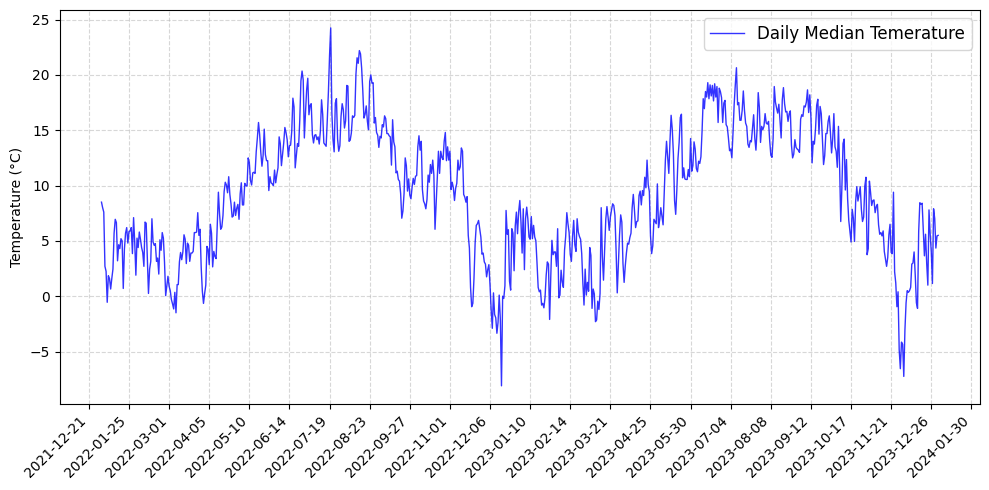

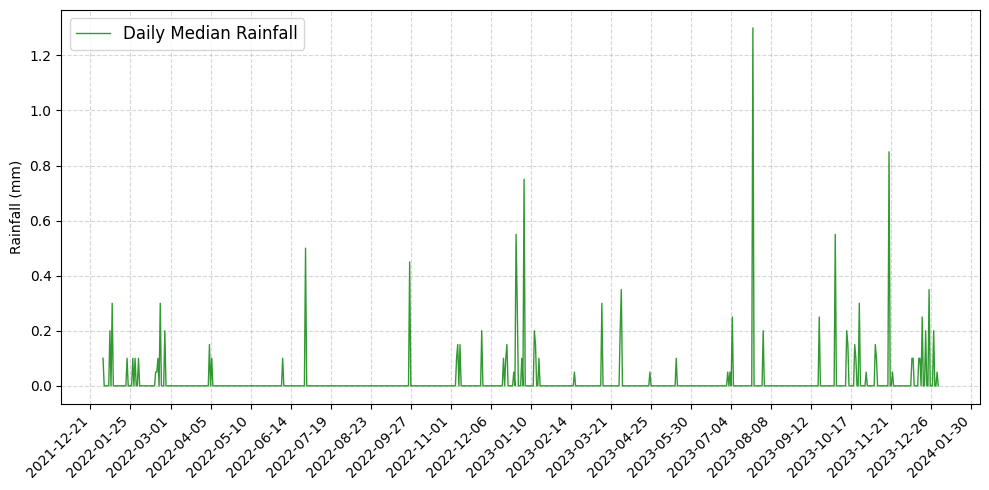

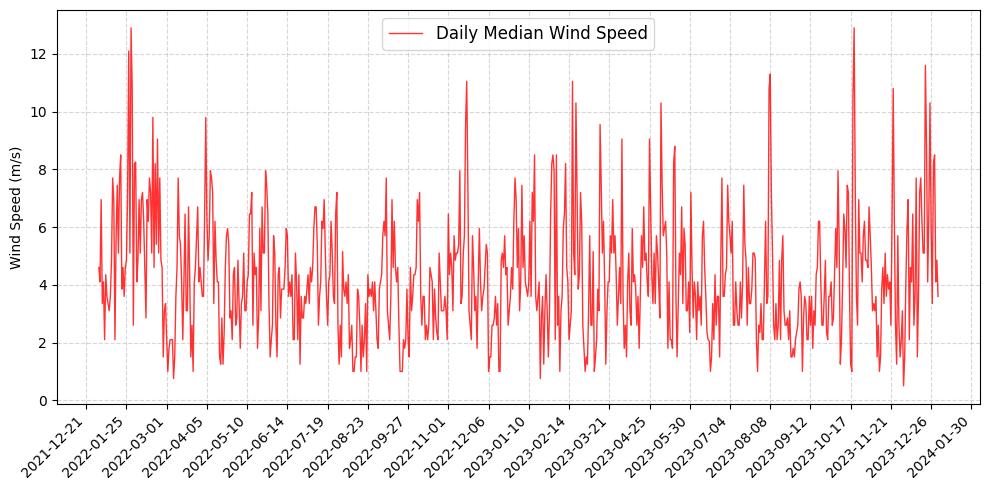

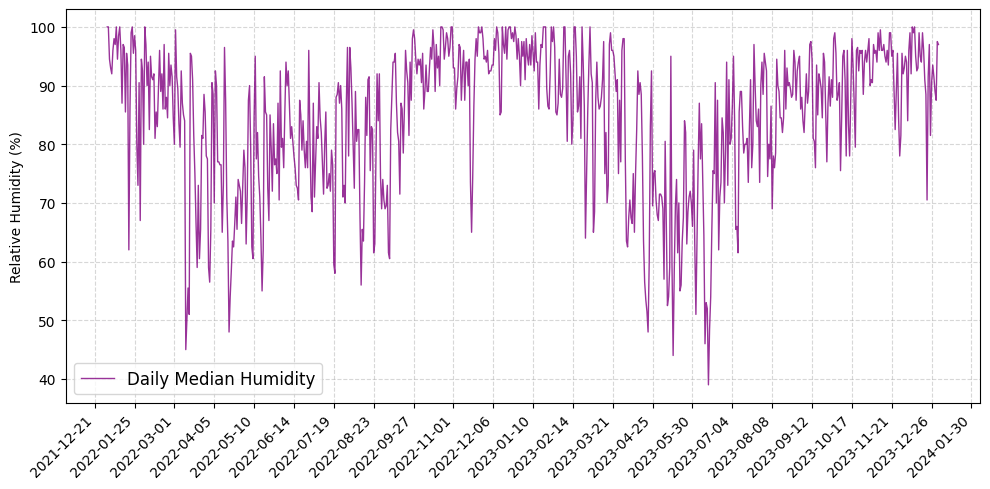

In [4]:
show_plot("temp", "Temerature", "blue", "Temperature (°C)")
show_plot("rain", "Rainfall", "green", "Rainfall (mm)")
show_plot("wind", "Wind Speed", "red", "Wind Speed (m/s)")
show_plot("humidity", "Humidity", "purple", "Relative Humidity (%)")